In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#%matplotlib nbagg

In [49]:
def plot_polygon(vx):
    vx = list(np.copy(vx))
    vx.append(vx[0])
    vx = np.array(vx)
    plt.plot(vx.T[0], vx.T[1])
    plt.scatter(np.array(vx).T[0], np.array(vx).T[1])
    
def section_point(p0, p1, r=1):
    return [(p0[0] + r*p1[0]) / (1 + r), (p0[1] + r*p1[1]) / (1 + r)]
    
def section_points(vx, r=1):
    return [section_point(vx[i], vx[i+1], r=r) if i<len(vx)-1
            else section_point(vx[-1], vx[0], r=r)
            for i in range(len(vx))]

def higher_point(vx):
    idxs = np.where( np.array(vx).T[1] == max(np.array(vx).T[1]) )[0]
    print(idxs)
    return [vx[i] for i in idxs ]

# Random Sierpinski triangle

In [4]:
#Vertices of the triangle
v0 = [[1,1], [4,4], [7,1]]
vs = []

#initial point inside the triangle
p0 = [2,2]

#Number of iterations and ratio of the line segments
N  = 30000
r  = 1

#Chaos game
for _ in range(N):
    random_v = v0[np.random.choice(range(len(v0)))]
    r_point  = section_point(p0=p0, p1=random_v, r=r)
    vs.append(r_point)
    p0 = r_point

<IPython.core.display.Javascript object>


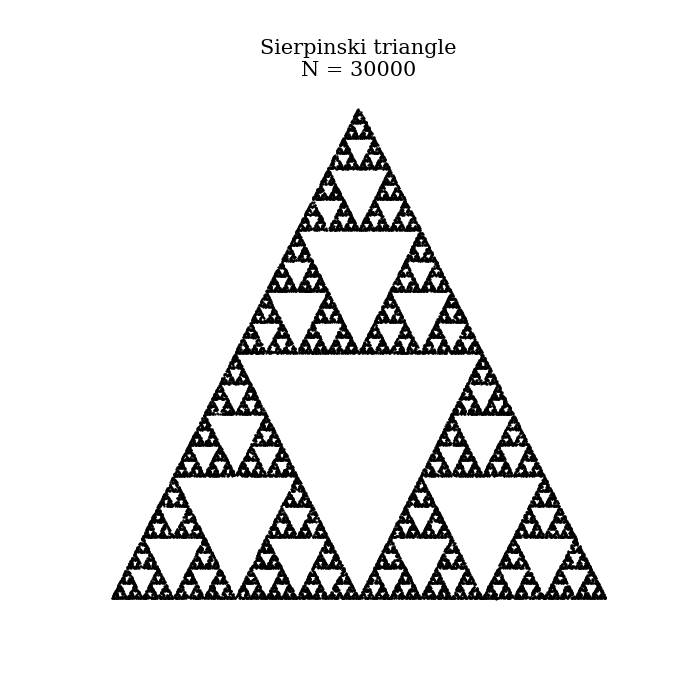

In [9]:
#Amount of points to plot each iteration
step = 500
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(vs)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}
fig = plt.figure(figsize=(7,7))

def init_function():
    #return plt.scatter(x=np.array(v0).T[0], y=np.array(v0).T[1], s=2, c="black")
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.
def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs).T[0][0:idx], y=np.array(vs).T[1][0:idx], s=0.4, c="black")
    plt.axis("off")
    plt.title("Sierpinski triangle\nN = %.i"%idx, fontdict=font_title)
    idx+=step
    plt.show()
    
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)

# Restricted Chaos Game

The chaos game for a square. When no restriction is placed then the square fills homogeneously with random points, but when a restriction is imposed  fractals appear.

In [68]:
#Vertices of the square
v0_s = [[1,1], [1, 5], [5,5], [5,1]]
vs_s = []

#initial point inside the square
p0_s = [2,2]

#Number of iterations and ratio of the line segments
N  = 30000
r  = 1

#Restricted chaos game
current_v = v0_s[np.random.choice(range(len(v0_s)))]
for _ in range(N):
    r_point  = section_point(p0=p0_s, p1=current_v, r=r)
    p0_s     = r_point
    vs_s.append(r_point)
    
    #Restriction: next vertice can't be the same as the previous one
    aux_v = v0_s[np.random.choice(range(len(v0_s)))]
    while current_v == aux_v:
        aux_v = v0_s[np.random.choice(range(len(v0_s)))]
    current_v = aux_v

vs_s = np.array(vs_s)

<IPython.core.display.Javascript object>


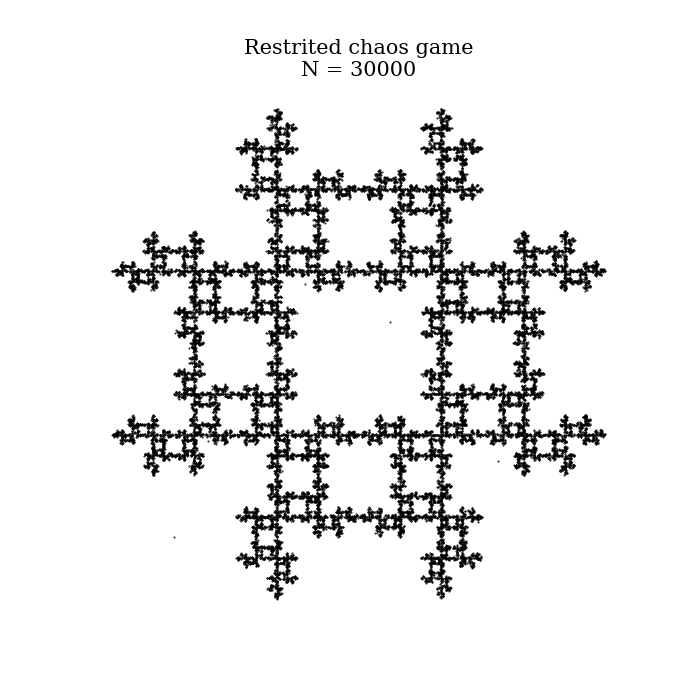

In [69]:
#Amount of points to plot each iteration
step = 100
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(vs_s)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}
fig = plt.figure(figsize=(7,7))

def init_function():
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.
def draw(i):
    global idx
    plt.cla()
    plt.scatter(x=np.array(vs_s).T[0][0:idx], y=np.array(vs_s).T[1][0:idx], s=0.2, c="black")
    plt.axis("off")
    plt.title("Restrited chaos game\nN = %.i"%idx, fontdict=font_title)
    idx+=step
    plt.show()
    
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./Sierpinski_triangle.gif', writer='ffmpeg', fps=10, bitrate=1000)

In [61]:
while 2==3:
    print("hola")